In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
info=pd.read_csv('/content/drive/MyDrive/Music_recom_proj/200_users_user_n_song.tsv',sep='\t')

In [ ]:
info.columns=['user_id','song_name','listen_count']
info.head()
'''song_user=info.groupby('user_id')['song_name'].count()
song_user.head()'''


"song_user=info.groupby('user_id')['song_name'].count()\nsong_user.head()"

In [ ]:
song_features=info.pivot_table(index='user_id',columns='song_name',values='listen_count').fillna(0)
user_song_matrix=csr_matrix(song_features.values)
song_features

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Ég Mun Læknast!,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn
user_id,,,,,,,,,,,,,,,,,,,,,
user_000002,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,3.0
user_000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000012,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000970,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000973,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
song_features.loc[200]=song_features.sum(axis=0)
song_features['counts']=song_features.sum(axis=1)
song_features

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts
user_id,,,,,,,,,,,,,,,,,,,,,
user_000002,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,3.0,40320.0
user_000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8104.0
user_000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7036.0
user_000012,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39273.5
user_000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_000970,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15796.0
user_000973,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11143.0
user_000986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27096.0


In [ ]:
row=song_features.iloc[200]
total_sum=0
for i in range(40279):
  total_sum+=row[i]
avg=total_sum/40279
print(avg)  


114.82966309987835


In [ ]:
cols=song_features.columns.values.tolist()
tail_songs=[]
for i in range(40279):
  if row[i]<=avg+100:
    tail_songs.append(cols[i])
print(len(tail_songs))


35393


In [ ]:
song_features=song_features.drop(200)
song_features

KeyError: ignored

Splitting train and test data


In [ ]:
train=song_features.sample(frac=0.7,random_state=42) 
test=song_features.drop(train.index)
train.head()

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts
user_id,,,,,,,,,,,,,,,,,,,,,
user_000427,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36324.0
user_000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5020.0
user_000135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,17320.0
user_000779,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,22354.0
user_000647,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15525.0


In [ ]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
avg=train['counts'].sum(axis=0)
avg=avg/140
print(avg)


23547.82857142857


In [ ]:
train=train.sort_values(by="counts",ascending=False)
train.head()

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts
user_id,,,,,,,,,,,,,,,,,,,,,
user_000791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124751.0
user_000544,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,2.0,93256.0
user_000577,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,67112.0
user_000691,6.0,0.0,3.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,61204.0
user_000298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59810.0


In [ ]:
popular=train.iloc[:14]
long_tail=train.iloc[14:]

In [ ]:
popular.head()

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts
user_id,,,,,,,,,,,,,,,,,,,,,
user_000791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124751.0
user_000544,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,2.0,93256.0
user_000577,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,67112.0
user_000691,6.0,0.0,3.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,61204.0
user_000298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59810.0


In [ ]:
long_tail.head()


song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Época,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts
user_id,,,,,,,,,,,,,,,,,,,,,
user_000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44647.0
user_000293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42790.0
user_000170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41639.0
user_000313,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41391.0
user_000702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41186.0


In [ ]:
print(126**0.5)

11.224972160321824


ELBOW METHOD 

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 13):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(long_tail) 
  wcss.append(kmeans.inertia_)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from numpy import count_nonzero
X = StandardScaler().fit_transform(temp_tail)
print(X)
tsvd = TruncatedSVD(n_components=2)
X_sparse = csr_matrix(X)
print(X_sparse)
 
# apply the truncatedSVD function
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)
print(X_sparse_tsvd)
 
# shape of the reduced matrix
print(X_sparse_tsvd.shape)

K-Means

ratio is : 99.74%


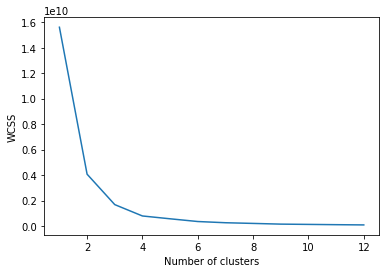

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)
df = pca.fit_transform(long_tail)
print('ratio is : {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
df.shape

wcss = []
for i in range(1, 13):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df) 
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#print(df)

Applying k means


In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)

label=Kmean.fit_predict(df)
print(label)

long_tail['l_cluster']=label
#print(df)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
long_tail.head()

song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts,l_cluster
user_id,,,,,,,,,,,,,,,,,,,,,
user_000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44647.0,2
user_000293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42790.0,2
user_000170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41639.0,2
user_000313,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41391.0,2
user_000702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41186.0,2


the dimension of cluster 0 is : (33, 2)
the dimension of cluster 1 is : (37, 2)
the dimension of cluster 2 is : (20, 2)
the dimension of cluster 3 is : (36, 2)


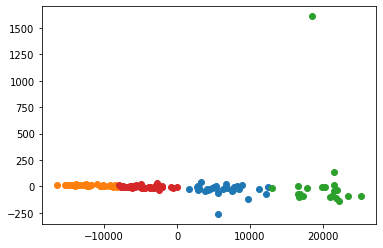

In [ ]:
for i in range(4):
  filtered_label = df[label == i]
  print("the dimension of cluster %d is :"%i, filtered_label.shape)
  plt.scatter(filtered_label[:,0] , filtered_label[:,1])




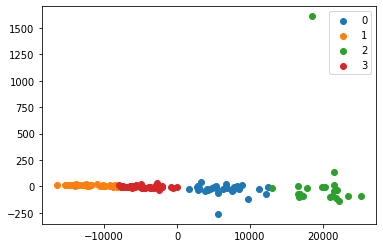

[[ 6.07938401e+03 -2.79218420e+01]
 [-1.17312183e+04  1.03398864e+01]
 [ 1.97268109e+04  3.35460737e+01]
 [-4.47502259e+03 -3.66879127e+00]]


In [ ]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()
l_centroids  = Kmean.cluster_centers_
print(l_centroids)

In [ ]:
pca = PCA(2)
pc = pca.fit_transform(popular)
print('ratio is : {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
pc.shape

ratio is : 99.74%


(14, 2)

In [ ]:
Kmean = KMeans(n_clusters=14)
label=Kmean.fit_predict(pc)
print(label)
#print(pc)
popular['p_cluster']=label
popular.head()

[ 1  2  4  3  8  7  5  9 11  0  6 13 12 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Í Gær,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts,p_cluster
user_id,,,,,,,,,,,,,,,,,,,,,
user_000791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124751.0,1
user_000544,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,1.0,0.0,0.0,0.0,2.0,93256.0,2
user_000577,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,67112.0,4
user_000691,6.0,0.0,3.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,61204.0,3
user_000298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59810.0,8


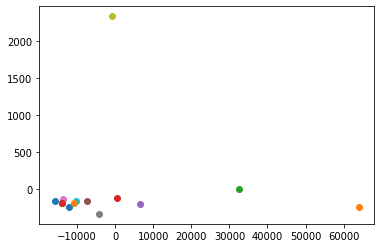

In [ ]:
for i in range(14):
  filtered_label = pc[label == i]
  #print("the dimension of cluster %d is :"%i, filtered_label.shape)
  plt.scatter(filtered_label[:,0] , filtered_label[:,1])
p_centroids  = Kmean.cluster_centers_
#print(p_centroids)

In [ ]:
pca = PCA(2)
#print(test)
test1 = pca.fit_transform(test)
#print(test1)
print('ratio is : {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
test1.shape

ratio is : 99.88%


(60, 2)

In [ ]:

def findlabel(test,centroids,k):
  label=-1
  distance=9999999999
  length=len(test1)
  user_l=[]
  for i in range(length):
    temp=0
    for j in range(k):
      temp=abs(test[i][0]-centroids[j][0])+abs(test[i][1]-centroids[j][1])
      
      if temp<=distance:
        distance=temp
        label=j
      temp=0
    user_l.append(label)
  return user_l

    



Finding labels of test data for popular and longtail users

In [ ]:
p_cluster=findlabel(test1,p_centroids,14)
l_cluster=findlabel(test1,l_centroids,4)
print((p_cluster)) 
print((l_cluster))
#print(long_tail)
test['p_cluster']=p_cluster
test['l_cluster']=l_cluster
test.head()

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


song_name,#1,#1 Crush,#1 Hit Song,#1 Must Have,#3,#41,#5,#9 Dream,$$$$,& Down,...,Ísland,Ó Fridur,Óskabörn Þjóðarinnar,Öll Birtan,Öngyilkos Vasárnap,Övningsköra,Þversögn,counts,p_cluster,l_cluster
user_id,,,,,,,,,,,,,,,,,,,,,
user_000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8104.0,12,1
user_000024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,14585.0,12,1
user_000025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,16.0,0.0,19576.0,12,3
user_000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5256.0,12,3
user_000052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14020.0,12,3


Recommendation part

In [ ]:
i=0
row=long_tail.iloc[i]
print(row)
cols=long_tail.columns.values.tolist()
rec_songs=[]
#print(row[40279])
#print()
for k in range(0,40279):
  if(row[k]!=0):
    rec_songs.append(cols[k])
  
print(len(rec_songs))


In [ ]:
cols=long_tail.columns.values.tolist()
def recommendations(pc,lc):
  lc_song={}
  pc_song={}
  for i in range(0,126):
    row=long_tail.iloc[i]
    if(row[40280]==lc):
     
      for k in range(0,40279):
        if(row[k]!=0):
          
          if cols[k] in lc_song:
            lc_song[cols[k]]+=row[k]
          else:
            lc_song[cols[k]]=row[k]
 
  for i in range(0,14):
    row=popular.iloc[i]
    if(row[40280]==pc):
      for k in range(0,40279):
        if(row[k]!=0):
         
          if cols[k] in pc_song:
            pc_song[cols[k]]+=row[k]
          else:
            pc_song[cols[k]]=row[k]
  
  for i in lc_song:
    if i in pc_song:
      pc_song[i]+=lc_song[i]
    else:
      pc_song[i]=lc_song[i]
  song_list=dict(reversed(sorted(pc_song.items(), key=lambda item: item[1])))
  rec_songs_list=list(song_list.keys())
  return rec_songs_list
 
  




In [ ]:
#rec_songs_lc=[]
  #rec_songs_pc=[]
  #lc_user_list=[]

 #lc_user_list.append(i)

 #rec_songs_lc.append(cols[k])

  #print(len(set(rec_songs_lc)))
  #rec_songs_lc=list(set(rec_songs_lc))

 #rec_songs_pc.append(cols[k])


#print(len(set(rec_songs_pc)))
  #print(lc_user_list)
  #rec_songs_pc=list(set(rec_songs_pc))

  #print(len(song_list))
  #print(len(lc_song))

   #return rec_songs_list,lc_user_list
  #return rec_songs_lc,rec_songs_pc

'''for i in range(0,60):
  row=test.iloc[i]
  pc=row[40280]
  lc=row[40281]
   '''


accuracy testing for test data 1

In [ ]:
row=test.iloc[0]
t_count=0
actual_songs=[]
for i in range(0,40278):
  if row[i]!=0:
      t_count+=1
      actual_songs.append(cols[i])
print(row)
#list_lc,list_pc=recommendations(row[40280],row[40281])
rec_songs=recommendations(row[40280],row[40281])
#print(len(list_lc),len(list_pc))
#rec_songs= list(set((list_lc+list_pc)))
print(t_count,rec_songs)


In [ ]:
print(rec_songs)
#rec_songs=set(rec_songs)
#rec_songs=tail_songs.intersection(rec_songs)
#print(len(rec_songs),rec_songs)
#rec_songs=list(rec_songs)
#print(rec_songs)
#actual_songs=set(actual_songs)
#actual_songs=actual_songs.intersection(tail_songs)
#rec_songs=list(rec_songs)
#actual_songs=list(actual_songs)
#rec_songs=rec_songs[0:60]
rec_songs=[x for x in rec_songs if x in tail_songs]
actual_songs=[x for x in actual_songs if x in tail_songs]
print(rec_songs)
#rec_songs=rec_songs[-60:]
print(len(rec_songs),len(actual_songs))
hit=0 
miss=0
'''
for j in range(0,40278):
  if(row[j]>0):
    #print("The song at the column :", cols[j])
    song=cols[j]

    if song in rec_songs:
      hit+=1
      ind=rec_songs.index(song)
    #else:
      #miss+=1
'''
for i in range(0,len(rec_songs)):
  if rec_songs[i] in actual_songs:
    hit+=1
  else:
    miss+=1

print(hit,miss)    
#print("Accuracy is ",hit/37595)
print("precision is ",hit/t_count)
print("precision is ",hit/(hit+miss))




In [ ]:
def getPrecision(test):
  total_precision=0
  accuracy=0
  for i in range(60):
    row=test.iloc[i]
    t_count=0
    actual_songs=[]
    for j in range(0,40278):
      if row[j]!=0:
          t_count+=1
          actual_songs.append(cols[j])
    rec_songs=recommendations(row[40280],row[40281])
    rec_songs=[x for x in rec_songs if x in tail_songs]
    actual_songs=[x for x in actual_songs if x in tail_songs]
    rec_songs=rec_songs[-50:]
    hit=0 
    miss=0
    for j in range(0,len(rec_songs)):
      if rec_songs[j] in actual_songs:
        hit+=1
      else:
        miss+=1
    total_precision+=(hit/(hit+miss))
    
    TN=len(tail_songs)-len(rec_songs)-len(actual_songs)+hit
    FN=len(actual_songs)-hit
    accuracy+=(hit+TN)/(hit+miss+TN+FN)
  precision=total_precision/60
  print("Total accuracy: ",(accuracy/60))
  print("Total precision: ",(precision))
  return precision

In [ ]:
precision=getPrecision(test)

Total accuracy:  0.8877565243598079
Total precision:  0.08866666666666666


In [ ]:
print(" 40= ",precision)

In [ ]:
print(precision)

0.088


In [ ]:
print(precision)

In [ ]:
print("tail precision for least 50",precision)

Using KNN


In [ ]:
def getDistance(lc_user_list,k):
  distance_dict={}
  for i in range(len(lc_user_list)):
    row=long_tail.iloc[lc_user_list[i]]
    row2=test.iloc[k]
    dist = abs(np.sum([(a-b) for a, b in zip(row2[0:40279], row[0:40279])]))
    distance_dict[i]=dist
  dist_list={k: v for k, v in sorted(distance_dict.items(), key=lambda item: item[1])}
  x=list(dist_list.keys())
  return x


In [ ]:
def usingKNN(x,n,index):
  cols=long_tail.columns.values.tolist()
  lc_song={}
  accuracy=0
  for i in range(n):
    row=long_tail.iloc[x[i]]
    for k in range(0,40279):
      if(row[k]!=0):
        if cols[k] in lc_song:
          lc_song[cols[k]]+=row[k]
        else:
          lc_song[cols[k]]=row[k]
  y=test.iloc[index]
  pc_song={}
  for i in range(0,14):
    row=popular.iloc[i]
    if row[40280]==y[40280]:
      for k in range(0,40279):
        if(row[k]!=0):
          if cols[k] in pc_song:
            pc_song[cols[k]]+=row[k]
          else:
            pc_song[cols[k]]=row[k]
  for i in lc_song:
    if i in pc_song:
      pc_song[i]+=lc_song[i]
    else:
      pc_song[i]=lc_song[i]
  song_list=dict(reversed(sorted(pc_song.items(), key=lambda item: item[1])))
  rec_songs_list=list(song_list.keys())
  actual_songs=[]
  row=test.iloc[index]
  for j in range(0,40278):
    if row[j]!=0:
        actual_songs.append(cols[j])
  rec_songs_list=[x for x in rec_songs_list if x in tail_songs]
  rec_songs_list=rec_songs_list[-20:]
  actual_songs=[x for x in actual_songs if x in tail_songs]
  hit=0
  miss=0    
  for i in range(0,len(rec_songs_list)):
    if rec_songs_list[i] in actual_songs:
      hit+=1
    else:
      miss+=1
  TN=len(tail_songs)-len(rec_songs_list)-len(actual_songs)+hit
  FN=len(actual_songs)-hit
  accuracy=(hit+TN)/(hit+miss+TN+FN)
  return hit/(hit+miss),accuracy


In [ ]:
#dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(test.iloc[k], row)]))
#print(dist)
#print(long_tail,dist_list)
#x=list(dist_list.keys())
#****************
#rec_songs_lc.append(cols[k]
#print(lc_song)
#rec_songs_lc.append(cols[k])

 #print(song_list)
  #rec_songs_list=rec_songs_list[0:20]
  #print(rec_songs_list)
  #print(actual_songs)
  #print(hit,miss)    
  #print("precision is ",hit/(hit+miss))



In [ ]:
def getUserList(lc):
  lc_user_list=[]
  for i in range(0,126):
    row=long_tail.iloc[i]
    if(row[40280]==lc):
      lc_user_list.append(i)
  return lc_user_list

In [ ]:
values=[]
for n in range(1,8):
  p=0
  a=0
  for i in range(60):
    row=test.iloc[i]
    user_list=getUserList(row[40281])
    x=getDistance(user_list,i)
    #print(x)
    precision,accuracy=usingKNN(x,n,i)
    #print(precision)
    p=p+precision
    a=a+accuracy
  print("Total precision",p/60)
  print("Total accuracy",a/60)
  values.append(p/60)




Total precision 0.1375
Total accuracy 0.88850902720877
Total precision 0.14250000000000002
Total accuracy 0.8885146780436809
Total precision 0.15166666666666667
Total accuracy 0.8885250379076841
Total precision 0.1516666666666667
Total accuracy 0.8885250379076841
Total precision 0.1541666666666667
Total accuracy 0.8885278633251394
Total precision 0.15416666666666667
Total accuracy 0.8885278633251392
Total precision 0.15583333333333335
Total accuracy 0.8885297469367762


In [ ]:
plt.plot([1,2,3,4,5,6,7], values)
plt.xlabel('N neighbours')
plt.ylabel('Tail Precisiom')
plt.show()

For least 50

In [ ]:
values=[]
for n in range(1,8):
  p=0
  for i in range(60):
    row=test.iloc[i]
    user_list=getUserList(row[40281])
    x=getDistance(user_list,i)
    #print(x)
    precision=usingKNN(x,n,i)
    #print(precision)
    p=p+precision
  print("Total precision",p/60)
  values.append(p/60)

In [ ]:
plt.plot([1,2,3,4,5,6,7], values)
plt.title('For Least 50')
plt.xlabel('N neighbours')
plt.ylabel('Tail Precisiom')
plt.show()

In [ ]:
values=[]
for n in range(1,8):
  p=0
  for i in range(60):
    row=test.iloc[i]
    lc_user_list=getUserList(row[40281])
    x=getDistance(lc_user_list,i)
    #print(x)
    precision=usingKNN(x,n,i)
    #print(precision)
    p=p+precision
  print("Total precision",p/60)
  values.append(p/60)


In [ ]:
x=[1,2,3,4,5,6,7]
plt.plot(x,values)
plt.title("Top 40 songs")
plt.xlabel('N neighbours')
plt.ylabel('Tail Precision')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7]
y1=[0.18833333333333338,0.16399999999999998,0.17333333333333326,0.15899999999999997,0.14166666666666666,0.15133333333333326,0.16333333333333336]
y2=[0.1366666666666667,0.14041666666666666,0.14,0.13749999999999998,0.13916666666666663,0.13291666666666666,0.13416666666666668]
y3=[0.13599999999999998,0.1363333333333333,0.13,0.13099999999999998,0.13166666666666668,0.13133333333333333,0.1293333333333333]
y4=[0.12688551490776276,0.1256162739939954,0.12566917714006298,0.12538527256662105,0.12163063262756234,0.1204004127841634,0.11871507720048066]
plt.plot(x,y1,label="20 least popular songs")
plt.plot(x,y3,label="40 least popular songs")
plt.plot(x,y2,label="50 least popular songs")
plt.plot(x,y4,label="All recommendation")
#plt.plot(x, y1, '-r', linewidth=3, label='red line')
plt.title('N neighbours vs Tail precision')
plt.xlabel('N neighbours')
plt.ylabel('Tail Precision')
plt.legend()
plt.show()


In [ ]:

p=0
a=0
for i in range(60):
  row=test.iloc[i]
  user_list=getUserList(row[40281])
  #print(user_list)
  x=getDistance(user_list,i)
  #print(x)
  precision,acc=usingKNN(x,1,i)
  #print(precision)
  #print(precision)
  #print(i,precision)
  p=p+precision
  a+=acc
print("Total precision",p/60)
print("total accuracy",a/60)

Total precision 0.13666666666666666
total accuracy 0.8885080854029517


In [ ]:
row=long_tail.iloc[0]
print(row[0:40280])

Distance weighted KNN

In [ ]:
import itertools
def usingWeightedKNN(x,n,index):
  #here x is a dictionary --> {{user_id,dist}}
  cols=long_tail.columns.values.tolist()
  lc_song_final={}

  for i in range(n):
    row=long_tail.iloc[x[i][0]]
    lc_song={}

    for k in range(0,40279):

      if(row[k]!=0):
        #rec_songs_lc.append(cols[k]
        if cols[k] in lc_song:
          lc_song[cols[k]]+=row[k]
        else:
          lc_song[cols[k]]=row[k]

    num_songs=int(len(lc_song)*(1/x[i][1]))
    song_list_temp=dict(sorted(lc_song.items(), key=lambda item: item[1]))
    #top songs
    lc_song=dict(itertools.islice(d.items(), num_songs))
    lc_song_final.update(lc_song)



         

  song_list=dict(sorted(lc_song_final.items(), key=lambda item: item[1]))
  #print(song_list)
  rec_songs_list=list(song_list.keys())
  rec_songs_list=rec_songs_list[-50:]
  actual_songs=[]
  row=test.iloc[index]
  for j in range(0,40278):
    if row[j]!=0:
        actual_songs.append(cols[j])
  hit=0
  miss=0    
  for i in range(0,50):
    if rec_songs_list[i] in actual_songs:
      hit+=1
    else:
      miss+=1
  #print(hit,miss)    
  #print("precision is ",hit/(hit+miss))
  return hit/(hit+miss)

In [ ]:
def getDistance_wknn(lc_user_list,k):
  distance_dict={}
  for i in range(len(lc_user_list)):
    row=long_tail.iloc[lc_user_list[i]]
    row2=test.iloc[k]
    dist = abs(np.sum([(a-b) for a, b in zip(row2[0:40279], row[0:40279])]))
    distance_dict[i]=dist
  dist_list={k: v for k, v in sorted(distance_dict.items(), key=lambda item: item[1])}
  return dist_list

In [ ]:
def weightedKNN():
  values=[]
  for n in range(1,8):
    p=0
    for i in range(60):
      row=test.iloc[i]
      lc_user_list=getUserList(row[40281])
      x=getDistance_wknn(lc_user_list,i)
      weights=[]
      for j in range(n):
        weights.append(1/x[j])
      x=list(x.keys())
      length=len(weights)
      #print(weights)
      tot_weigth=sum(weights)
      weights=[(weight/tot_weigth) for weight in weights]
      weights=[round(weight*20) for weight in weights]

      cols=long_tail.columns.values.tolist()
      lc_song={}
      for j in range(n):
        row=long_tail.iloc[x[j]]
        temp={}
        for k in range(0,40279):
          if(row[k]!=0):
            #rec_songs_lc.append(cols[k]
            if cols[k] in temp:
              temp[cols[k]]+=row[k]
            else:
              temp[cols[k]]=row[k]
        temp=dict((sorted(temp.items(), key=lambda item: item[1])))
        y=list(temp.keys())
        y=[x for x in y if x in tail_songs]
        y=y[0:weights[j]]
        for k in range(len(y)):
          if y[k] in lc_song:
            lc_song[y[k]]+=temp[y[k]]
          else:
            lc_song[y[k]]=temp[y[k]]
      
      lc_song=list(lc_song.keys())
      #print(lc_song)
      actual_songs=[]
      row=test.iloc[i]
      for j in range(0,40278):
        if row[j]!=0:
            actual_songs.append(cols[j])
      actual_songs=[x for x in actual_songs if x in tail_songs]
      hit=0
      miss=0    
      for j in range(0,len(lc_song)):
        if lc_song[j] in actual_songs:
          hit+=1
        else:
          miss+=1
      p=p+(hit/(hit+miss))
    print(p/60)
    values.append(p/60)
        
      #print(weights)
      #print(x)
      #precision=usingKNN(x,n,i)
      #print(precision)
      #p=p+precision
  #print("Total precision",p/60)
  #values.append(p/60)

In [ ]:
def weightedKNN():
  values=[]
  for n in range(1,8):
    p=0
    for i in range(60):
      row=test.iloc[i]
      lc_user_list=getUserList(row[40281])
      x=getDistance(lc_user_list,i)
      weights=[]
      for j in range(n):
        weights.append(1/x[j])
      x=list(x.keys())
      length=len(weights)
      #print(weights)
      tot_weigth=sum(weights)
      weights=[(weight/tot_weigth) for weight in weights]
      weights=[round(weight*20) for weight in weights]

      cols=long_tail.columns.values.tolist()
      lc_song={}
      for j in range(n):
        row=long_tail.iloc[x[j]]
        temp={}
        for k in range(0,40279):
          if(row[k]!=0):
            if cols[k] in temp:
              temp[cols[k]]+=row[k]
            else:
              temp[cols[k]]=row[k]
        temp=dict(sorted(temp.items(), key=lambda item: item[1]))
        y=list(temp.keys())
        y=[x for x in y if x in tail_songs]
        y=y[0:weights[j]]
        for k in range(len(y)):
          if y[k] in lc_song:
            lc_song[y[k]]+=temp[y[k]]
          else:
            lc_song[y[k]]=temp[y[k]]
      
      lc_song=list(lc_song.keys())
      #print(lc_song)
      actual_songs=[]
      row=test.iloc[i]
      for j in range(0,40278):
        if row[j]!=0:
            actual_songs.append(cols[j])
      actual_songs=[x for x in actual_songs if x in tail_songs]
      hit=0
      miss=0    
      for j in range(0,len(lc_song)):
        if lc_song[j] in actual_songs:
          hit+=1
        else:
          miss+=1
      p=p+(hit/(hit+miss))
    print(p/60)
    values.append(p/60)

In [ ]:
weightedKNN()

NameError: ignored

In [ ]:
print(values)

NameError: ignored

## Final graphs

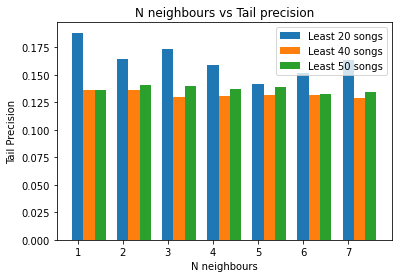

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

distances= [1,2,3,4,5,6,7]
#All_songs = [0.11291645678559421,0.11288015755079997,0.11291170448154722,0.11291645678559421]  #list of precisions obtained by using different dist measures

Top_50_songs = [0.14333333333333328,0.12833333333333335,0.13083333333333333,0.1295833333333333,0.13041666666666668,0.12875,0.13291666666666666]
Top_40_songs=[0.146,0.1343333333333333,0.12899999999999998,0.12799999999999997,0.13499999999999995,0.13333333333333328,0.13666666666666666]
Top_20_songs= [0.13666666666666666,0.10833333333333332,0.12916666666666668,0.1275,0.14,0.13666666666666666,0.13333333333333328]
least_20_songs=[0.18833333333333338,0.16399999999999998,0.17333333333333326,0.15899999999999997,0.14166666666666666,0.15133333333333326,0.16333333333333336]
least_40_songs=[0.13599999999999998,0.1363333333333333,0.13,0.13099999999999998,0.13166666666666668,0.13133333333333333,0.1293333333333333]
least_50_songs=[0.1366666666666667,0.14041666666666666,0.14,0.13749999999999998,0.13916666666666663,0.13291666666666666,0.13416666666666668]
x_axis = np.arange(len(distances))
#x_axis=2
# Multi bar Chart

plt.bar(x_axis +0.0005, least_20_songs, width=0.25, label = 'Least 20 songs')
plt.bar(x_axis +0.125*2, least_40_songs, width=0.25, label = 'Least 40 songs')
plt.bar(x_axis +0.167*3, least_50_songs, width=0.25, label = 'Least 50 songs')

# Xticks

plt.xticks(x_axis,distances)
plt.title('N neighbours vs Tail precision')
plt.xlabel('N neighbours')
plt.ylabel('Tail Precision')

# Add legend

plt.legend()

# Display

plt.show()

<Figure size 720x1.8 with 0 Axes>

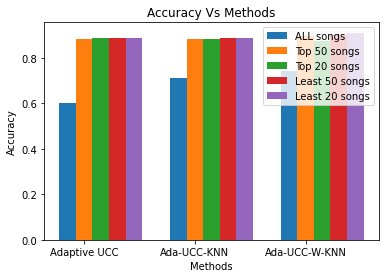

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
algo= ['Adaptive UCC','Ada-UCC-KNN','Ada-UCC-W-KNN']
all=[0.09,0.112880,0.10]
top50=[0.14833,0.146,0.149]
top20=[0.1283,0.14,0.144]
least50=[0.118,0.13633,0.14008]
least20=[0.0903,0.18833,0.189]
x_axis = np.arange(len(algo))
fig = plt.figure(figsize = (10, 0.025))
a_all=[0.602,0.712,0.744]
a_top50=[0.882,0.885,0.895]
a_top20=[0.888,0.885,0.875]
a_least50=[0.887,0.889,0.901]
a_least20=[0.888,0.888,0.911]


barWidth = 0.15
fig = plt.subplots(figsize =(6, 4))
br1 = np.arange(len(all))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

plt.bar(br1, all, width=0.15, label = 'ALL songs')
plt.bar(br2, top50, width=0.15, label = 'Top 50 songs')
plt.bar(br3, top20, width=0.15, label = 'Top 20 songs')
plt.bar(br4, least50, width=0.15, label = 'Least 50 songs')
plt.bar(br5, least20, width=0.15, label = 'Least 20 songs')

plt.xticks([r + barWidth for r in range(len(all))],algo)
plt.title('Tail precision Vs Methods')
plt.xlabel('Methods')
plt.ylabel('Tail Precision')


plt.legend()
plt.show()

